# Análisis Exploratorio de Datos - Parte 2: Presentación

## Ejemplo: consumo energético a nivel mundial

Objetivo:

1. Obtener el total de generación de energía eléctrica de un país en un rango de tiempo
2. Comparar gráficamente la generación energética de varios paises
3. Visualizar gráficamente la participación de cada tipo de generación de energía (% eólica, % hidroeléctrica, etc)

En la parte 1 leimos y procesamos el archivo "energia.csv", donde encontramos datos de generación de energía eléctrica de todos los países del mundo. El problema que vimos es que todos los países estaban en una sola columna, por lo que tuvimos que segmentar los datos en DataFrames individualizados por país. Este resultado, junto con estadísticas generales para todos los países, fueron exportados a un solo archivo de excel "energiaPaises.xlsx".

A continuación, recuperaremos los DataFrames almacenados en dicho archivo, y revisaremos formas óptimas de presentar la información con el principal módulo de Python para generación de gráficas: **matplotlib**

## Importar DataFrames desde Excel

In [5]:
import pandas as pd

# creamos el diccionario vacío donde almacenaremos los DF
paisesDict = {}
# creamos el lector de excel, se llamará "xlsx"
with pd.ExcelFile('energiaPaises.xlsx') as xlsx:
    # iteramos por los nombres de hojas
    for nombreHoja in xlsx.sheet_names:
        #clave del diccionario será el nombre de la hoja, indicamos la columna 0 como índice (year)
        paisesDict[nombreHoja] = pd.read_excel(xlsx,
                                               sheet_name=nombreHoja,
                                               index_col=0)
paisesDict

{'Colombia':       electricity_generation  population
 year                                    
 1990                  38.246  33103000.0
 1991                  40.124  33758000.0
 1992                  36.613  34423000.0
 1993                  41.691  35091000.0
 1994                  45.024  35759000.0
 1995                  47.483  36421000.0
 1996                  48.371  37076000.0
 1997                  49.906  37724000.0
 1998                  50.283  38364000.0
 1999                  47.775  38999000.0
 2000                  42.177  39630000.0
 2001                  42.461  40256000.0
 2002                  44.073  40875000.0
 2003                  45.594  41484000.0
 2004                  48.778  42076000.0
 2005                  49.347  42648000.0
 2006                  52.736  43201000.0
 2007                  54.196  43738000.0
 2008                  54.958  44255000.0
 2009                  55.854  44750000.0
 2010                  58.034  45223000.0
 2011                 

Recordemos que en la última hoja agregamos los cálculos estadísticos. Para regresar nuestro diccionario de DF de paises a la normalidad, pongamos el DF de cálculos estadísticos por aparte:

In [8]:
estadisticos = paisesDict['estadisticos']
paisesDict.pop('estadisticos')
estadisticos,paisesDict

(               Colombia         China  United States        Japon      Germany
 indice                                                                        
 count         31.000000  3.100000e+01      31.000000    31.000000    31.000000
 promedio      55.243129  3.176146e+03    3873.951710  1011.245968   592.196290
 std           13.122314  2.290291e+03     289.802562    56.886564    39.866653
 min           36.613000  6.212000e+02    3232.780000   881.500000   527.118000
 percentil25   45.309000  1.151275e+03    3726.510500   990.321000   554.485000
 50%           50.283000  2.421429e+03    3970.555000  1014.289000   603.900000
 75%           65.195500  5.179330e+03    4093.613500  1045.546500   629.850000
 max           78.252000  7.623696e+03    4203.937000  1111.465000   647.900000
 varianza     172.195120  5.245435e+06   83985.524894  3236.081114  1589.350000,
 {'Colombia':       electricity_generation  population
  year                                    
  1990               

# Personalización de gráficas con matplotlib

Para la generación de gráficas, *pandas* incorpora el módulo de gráficos **matplotlib**, por lo que si queremos acceder a configuraciones adicionales de las gráfdicas como las etiquetas y leyenda, debemos aprender a utilizarlo

In [18]:
import matplotlib.pyplot as plt

## Generalidades y gráficos de series de tiempo

### Líneas

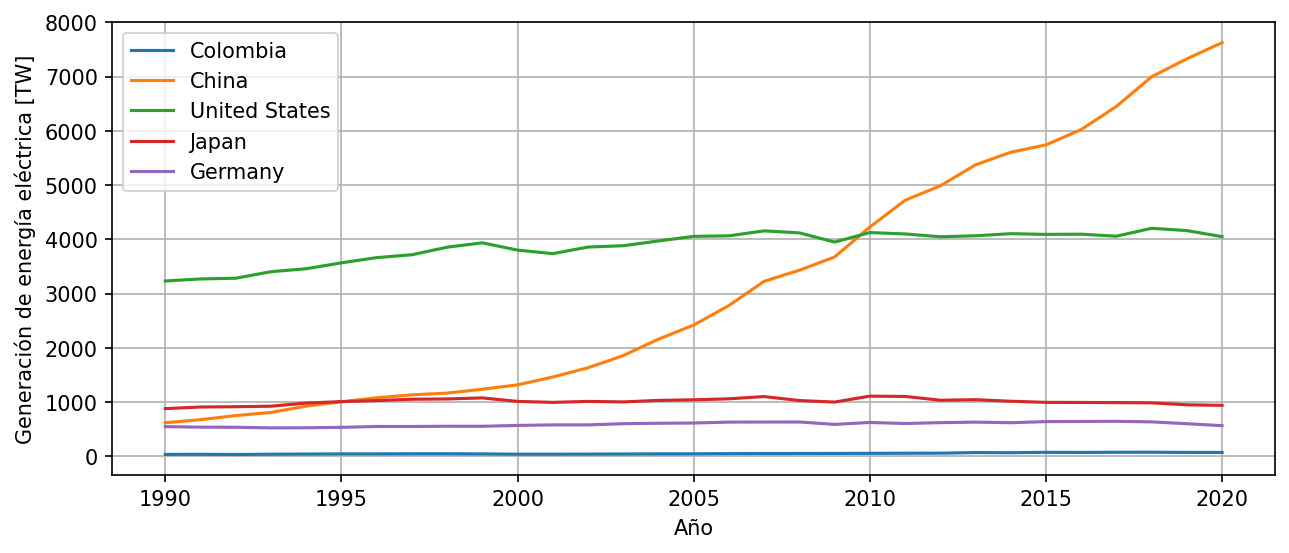

In [34]:
# Creamos el "lienzo" donde se pondrán las gráficas, luego los ejes ("ax")
# Se define un tamaño y resolución, para que se vea más bonita la figura
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)
# Generamos la gráfica
for paisNom,paisDf in paisesDict.items():
    # la gráfica básica de matplotlib: plt.plot( valores_eje_x , valores_eje_y )
    plt.plot(paisDf.index,paisDf['electricity_generation'])
# Etiqueta del eje x
ax.set_xlabel("Año")
# Etiqueta del eje y
ax.set_ylabel("Generación de energía eléctrica [TW]")
# Leyenda
ax.legend(paisesDict.keys())
# Cuadrícula
plt.grid()

### Dispersión

este es simplemente un ejemplo de uso de gráficas de dispersión. No representa un caso apropiado para el uso de un gráfico de dispersión

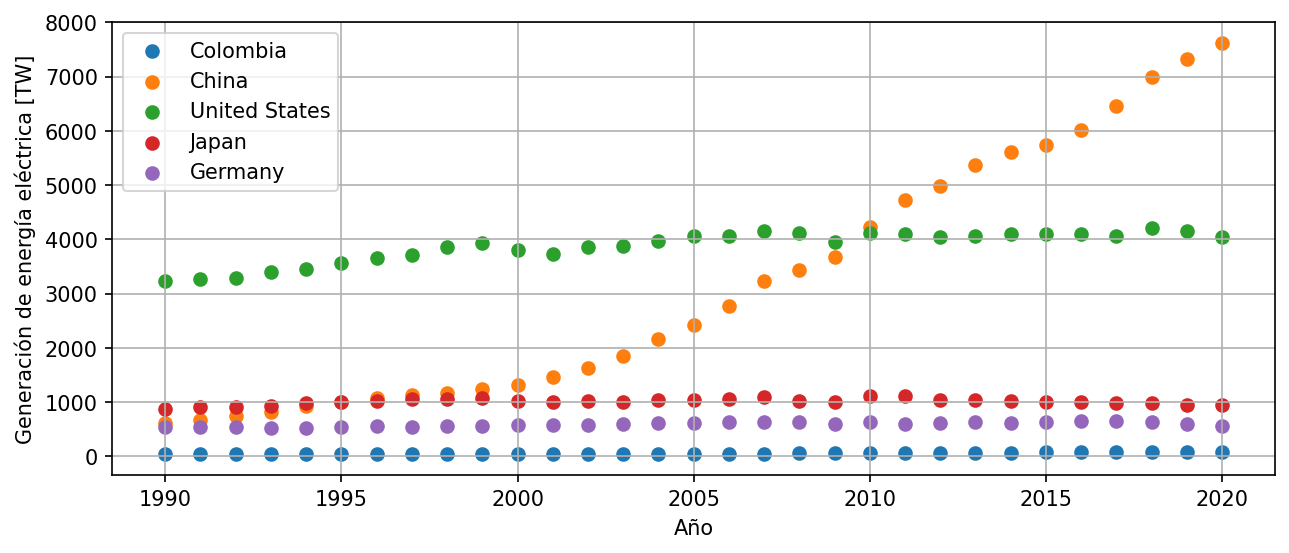

In [35]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

for paisNom,paisDf in paisesDict.items():
    plt.scatter(paisDf.index,paisDf['electricity_generation'])

ax.set_xlabel("Año")
ax.set_ylabel("Generación de energía eléctrica [TW]")
plt.legend(paisesDict.keys())
plt.grid()

## Área

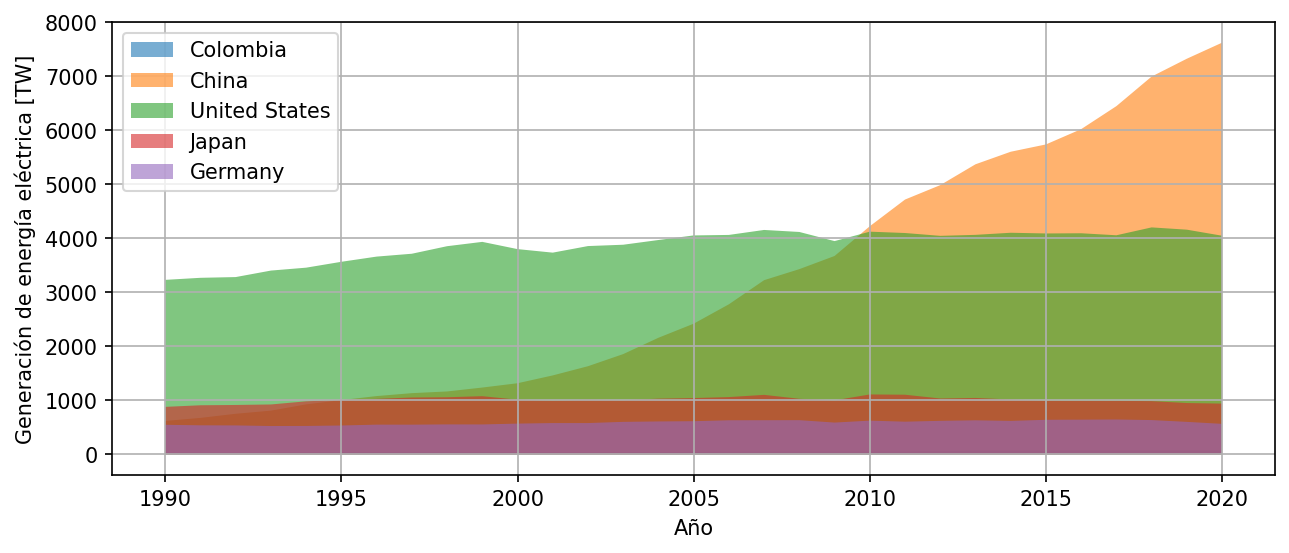

In [71]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

for paisNom,paisDf in paisesDict.items():
    # usamos alpha para hacer los gráficos transparentes, útil cuando hay datos superpuestos
    plt.fill_between(paisDf.index,paisDf['electricity_generation'],alpha=0.6)

ax.set_xlabel("Año")
ax.set_ylabel("Generación de energía eléctrica [TW]")
plt.legend(paisesDict.keys(),loc='upper left')
plt.grid()

## Otros gráficos de comparación

Para los siguientes gráficos usaremos los cálculos estadísticos

Es importante identificar lo que se quiere comparar. En este caso, compararemos los valores promedio, desviación estandar, máximo y mínimo de tres países: China, United States y Japon

In [60]:
# Con loc obtengo ["filas que quiero","columnas que quiero"] 
datosGraf = estadisticos.loc[['promedio','std','max','min'],['United States','China','Japon']]
datosGraf

,United States,China,Japon
indice,,,
promedio,3873.951710,3176.145742,1011.245968
std,289.802562,2290.291383,56.886564
max,4203.937000,7623.696000,1111.465000
min,3232.780000,621.200000,881.500000


### Barras

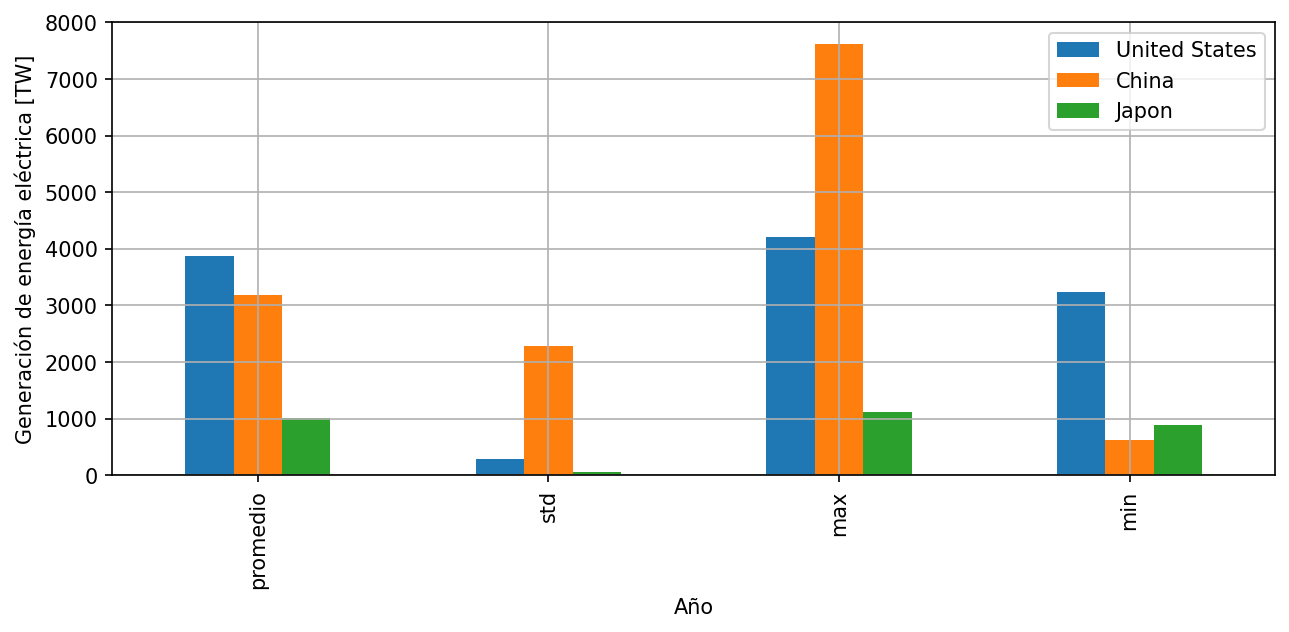

In [61]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

datosGraf.plot.bar(ax=ax)
ax.set_xlabel("Año")
ax.set_ylabel("Generación de energía eléctrica [TW]")
# plt.legend(paisesDict.keys())
plt.grid()

### Barras apiladas

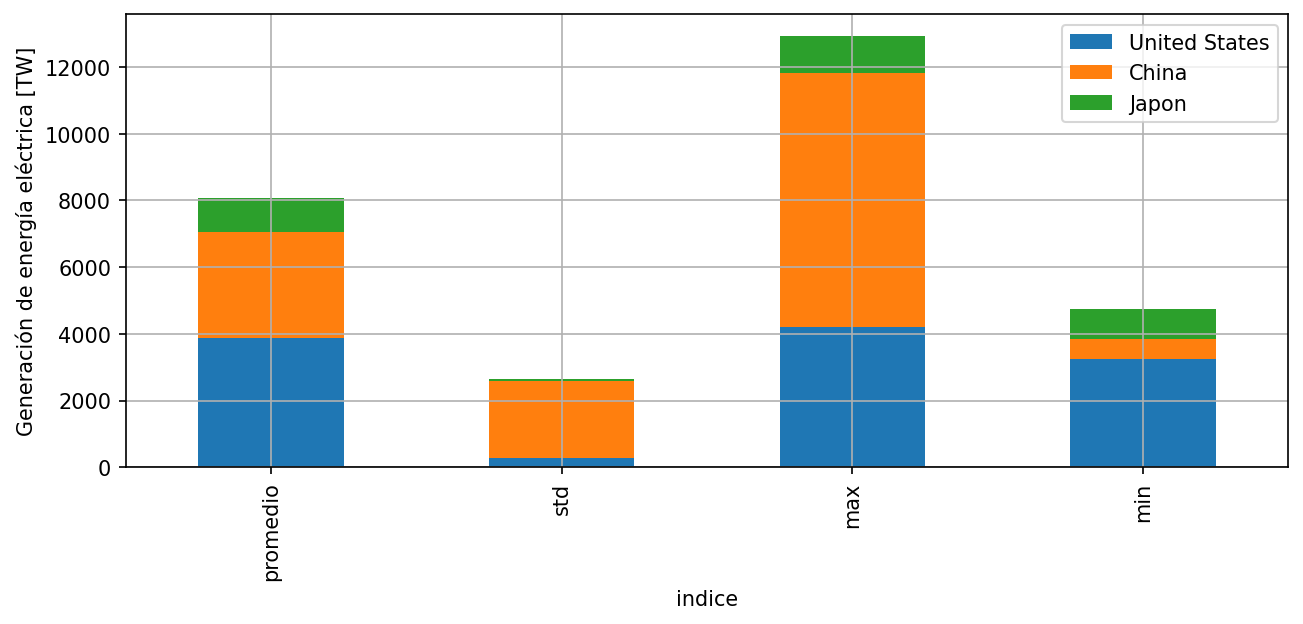

In [89]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

datosGraf.plot.bar(ax=ax,stacked=True)
ax.set_ylabel("Generación de energía eléctrica [TW]")
# plt.legend(paisesDict.keys())
plt.grid()

### Torta

Vamos a graficar el total de energía eléctrica generada por país, y usaremos un gráfico de torta para compararlos.

Para esto, vamos a calcular el acumulado de energía generada

In [92]:
acumulados = {}
for paisNom,paisDf in paisesDict.items():
    acumulados[paisNom] = paisDf['electricity_generation'].sum()
acumulados

{'Colombia': 1712.5370000000003,
 'China': 98460.51799999998,
 'United States': 120092.503,
 'Japan': 31348.625,
 'Germany': 18358.085000000003}

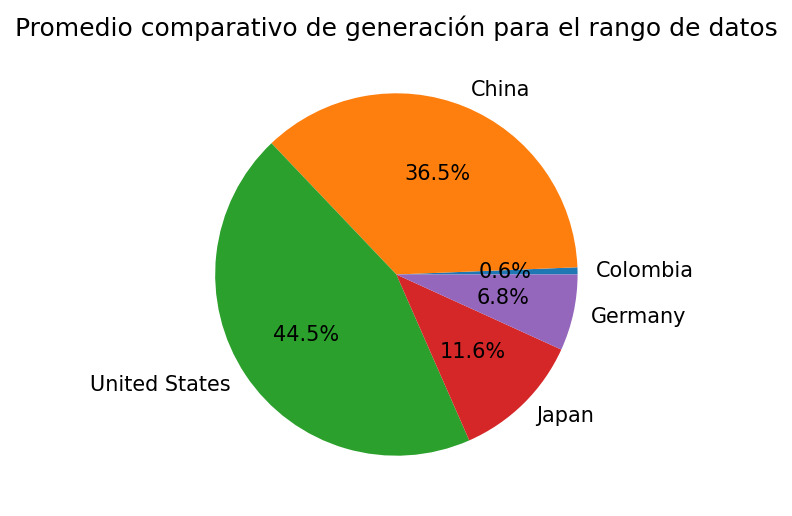

In [94]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)

ax = plt.pie(x=acumulados.values(),
             labels=acumulados.keys(),
             autopct='%.1f%%')
plt.title("Promedio comparativo de generación para el rango de datos")
plt.grid()

# Referencias

- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.htm
- Matplotlib Cheat Sheet: https://camo.githubusercontent.com/b1b8838502a81077591ccadbf45dc45f2207637b41245e557198b680b0a2e662/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f68616e646f75742d626567696e6e65722e706e67
- 